<br>

# TextVQG Evaluation Notebook
-----

In [5]:
import os
import json
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

from nlgeval import NLGEval


In [13]:
path = "./random_textVQA//"
models = next(os.walk(path))[1]
print(models)

['bert_x1x2_vocab2', 'text_VQA_original', 'gts', 'bert_wh_vocab2', 't5_x1x2_vocab2', 'FastText_x1x2_vocab1', 'bert_x1x2_vocab1', 'FastText_x1x2_vocab2', 't5_x1x2_vocab1', 'bert_wh_vocab1']


In [14]:
def test_different_questions(questions):
    return dict(Counter(questions))

In [15]:
from random import randrange
randrange(0, 600)

334

In [16]:
# Read data and save DataFrame

df_scores = pd.DataFrame()
df_gen_questions = pd.DataFrame()
df_gts_questions = pd.DataFrame()
df_indices = pd.DataFrame()

for model in models:
    epochs = next(os.walk(f"{path}/{model}"))[1]
    for epoch in epochs:
        e = epoch.split("-")[1]
        
        try:
            with open(f"{path}/{model}/{epoch}/preds.json") as file:
                gen_questions = json.load(file)
                file.close()
            aux = {}
            aux["Questions"] = test_different_questions(gen_questions)
            aux["all_questions"] = gen_questions
            aux["ModelName"] = model
            aux["Epoch"] = int(e)
            df_gen_questions = df_gen_questions.append(aux, ignore_index=True)
        except:
            pass
        
        try:
            with open(f"{path}/{model}/{epoch}/gts.json") as file:
                gts_questions = json.load(file)
                file.close()
            aux = {}
            aux["Questions"] = test_different_questions(gts_questions)
            aux["all_questions"] = gts_questions
            aux["ModelName"] = model
            aux["Epoch"] = int(e)
            df_gts_questions = df_gts_questions.append(aux, ignore_index=True)
        except:
            pass
        
        try:
            with open(f"{path}/{model}/{epoch}/results.json") as file:
                indices_list = json.load(file)
                file.close()
            ind = {}
            ind["Index"] = indices_list
            ind["ModelName"] = model
            ind["Epoch"] = int(e)
            df_indices = df_indices.append(ind, ignore_index=True)
        except:
            pass
        
        if not os.path.isfile(f"{path}/{model}/{epoch}/scores.json"):
            try:
                with open(f"{path}/{model}/{epoch}/preds.json") as file:
                    preds = json.load(file)
                    file.close()

                with open(f"{path}/{model}/{epoch}/gts.json") as file:
                    gts = json.load(file)
                    file.close()
            except:
                pass

            nlge = NLGEval(no_skipthoughts=True)
            scores = nlge.compute_metrics(ref_list=[gts], hyp_list=preds)

            with open(f"{path}/{model}/{epoch}/scores.json", 'w') as fp:
                json.dump(scores, fp)
        with open(f"{path}/{model}/{epoch}/scores.json") as file:
            scores = json.load(file)
            file.close()
        
        aux = {}
        aux["Bleu_1"] = scores["Bleu_1"]
        aux["Bleu_2"] = scores["Bleu_2"]
        aux["Bleu_3"] = scores["Bleu_3"]
        aux["Bleu_4"] = scores["Bleu_4"]
        aux["METEOR"] = scores["METEOR"]
        aux["ROUGE_L"] = scores["ROUGE_L"]
        aux["CIDEr"] = scores["CIDEr"]
        aux["EmbeddingAverageCosineSimilarity"] = scores["EmbeddingAverageCosineSimilarity"]
        aux["VectorExtremaCosineSimilarity"] = scores["VectorExtremaCosineSimilarity"]
        aux["GreedyMatchingScore"] = scores["GreedyMatchingScore"]
        aux["ModelName"] = model
        aux["Epoch"] = int(epoch.split("-")[1])

        df_scores = df_scores.append(aux, ignore_index=True)

        
#df_metrics = df_metrics.sort_values(["ModelName", "Epoch"])
df_gen_questions = df_gen_questions.sort_values(["ModelName", "Epoch"])
df_gts_questions = df_gts_questions.sort_values(["ModelName", "Epoch"])
df_scores = df_scores.sort_values(["ModelName", "Epoch"])

In [16]:
df_gen_questions = df_gen_questions[df_gen_questions["Epoch"]==40]
df_gts_questions = df_gts_questions[df_gts_questions["Epoch"]==20]
df_scores = df_scores[df_scores["Epoch"]==20]

In [53]:
df_scores

Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L     CIDEr  \
2   0.444775  0.304323  0.218289  0.158141  0.151344  0.431096  0.630564   
0   0.457803  0.317039  0.226284  0.162904  0.161818  0.439775  0.770709   
1   0.450153  0.305973  0.214646  0.152404  0.158747  0.429012  0.697565   
3   0.443562  0.298772  0.208858  0.146478  0.157032  0.424865  0.675522   
6   0.441308  0.302163  0.219354  0.160545  0.151891  0.434870  0.670053   
4   0.452017  0.312303  0.223934  0.161698  0.159636  0.438173  0.744848   
5   0.448742  0.307750  0.218092  0.155978  0.160396  0.433864  0.745255   
8   0.437321  0.294437  0.204161  0.144260  0.159041  0.424597  0.712251   
7   0.423866  0.273931  0.183296  0.123791  0.151766  0.405834  0.599201   
9   0.418594  0.265719  0.178704  0.121620  0.149961  0.402643  0.620589   
12  0.441934  0.303563  0.220026  0.160298  0.156329  0.440944  0.718376   
10  0.461881  0.315600  0.224464  0.161138  0.166294  0.440941  0.795665   
11  0.448137  0.301076  0.209273  0.144990  0.161391  0.430513  0.730389   
14  0.448141  0.298485  0.204697  0.140469  0.160147  0.431336  0.745217   
13  0.449775  0.302262  0.207312  0.142039  0.161798  0.427282  0.720531   
15  0.427053  0.274398  0.185890  0.128027  0.156055  0.419354  0.684040   
18  0.443376  0.304853  0.220378  0.160207  0.152876  0.437068  0.708055   
16  0.451835  0.311927  0.225140  0.163577  0.163929  0.440947  0.805409   
17  0.453835  0.308682  0.218264  0.156885  0.161735  0.435470  0.734216   
20  0.446407  0.299335  0.207008  0.143732  0.159272  0.427832  0.702285   
19  0.426906  0.279569  0.194914  0.138903  0.155715  0.414634  0.682508   
21  0.417400  0.267424  0.180874  0.123630  0.155895  0.407993  0.675918   

    EmbeddingAverageCosineSimilarity  VectorExtremaCosineSimilarity  \
2                           0.854931                       0.503704   
0                           0.856763                       0.517376   
1                           0.849600                       0.505671   
3                           0.847182                       0.502034   
6                           0.852726                       0.505892   
4                           0.853267                       0.515697   
5                           0.849587                       0.512405   
8                           0.851275                       0.506460   
7                           0.845064                       0.498570   
9                           0.839832                       0.492554   
12                          0.857357                       0.525041   
10                          0.856273                       0.526591   
11                          0.851222                       0.520021   
14                          0.847864                       0.514911   
13                          0.849220                       0.513356   
15                          0.847745                       0.516520   
18                          0.850829                       0.505972   
16                          0.854222                       0.520488   
17                          0.853042                       0.514554   
20                          0.849103                       0.505212   
19                          0.843084                       0.493153   
21                          0.845554                       0.498577   

    GreedyMatchingScore                 ModelName  Epoch  
2              0.738844  stvqa_FastText_01_vocab2    5.0  
0              0.743528  stvqa_FastText_01_vocab2   10.0  
1              0.735397  stvqa_FastText_01_vocab2   15.0  
3              0.732765  stvqa_FastText_01_vocab2   20.0  
6              0.739090      stvqa_bert_01_vocab2    5.0  
4              0.741807      stvqa_bert_01_vocab2   10.0  
5              0.737433      stvqa_bert_01_vocab2   15.0  
8              0.734023      stvqa_bert_01_vocab2   20.0  
7              0.725857      stvqa_bert_01_vocab2   25.0  
9              0.717317      stvq

In [9]:
for idx, model in df_gen_questions.iterrows():
    print("Model:", model["ModelName"], "  Epoch:", model["Epoch"])
    print("   --> Different questions:", len(model["Questions"]))
    #for q in model["Questions"]:
    #    print("        -", q, "   Rep.", model["Questions"][q])
    print(" ")

Model: 2stvqa-bert-vocab2   Epoch: 5.0
   --> Different questions: 142
 
Model: 2stvqa-t5-vocab2   Epoch: 5.0
   --> Different questions: 132
 
Model: 2stvqa_FastText-vocab2   Epoch: 5.0
   --> Different questions: 127
 
Model: textVQA_t5_vocab2   Epoch: 5.0
   --> Different questions: 1
 
Model: textVQA_t5_vocab2   Epoch: 10.0
   --> Different questions: 1
 
Model: textVQA_t5_vocab2   Epoch: 15.0
   --> Different questions: 1
 
Model: textVQA_t5_vocab2   Epoch: 20.0
   --> Different questions: 1
 
Model: textVQA_t5_vocab2   Epoch: 25.0
   --> Different questions: 4
 
Model: textVQA_t5_vocab2   Epoch: 30.0
   --> Different questions: 3
 
Model: textVQA_t5_vocab2   Epoch: 35.0
   --> Different questions: 3
 
Model: textVQA_t5_vocab2   Epoch: 40.0
   --> Different questions: 5
 
Model: tf1   Epoch: 5.0
   --> Different questions: 286
 


Model: 2stvqa-bert-vocab2
Model: 2stvqa-t5-vocab2
Model: 2stvqa_FastText-vocab2
Model: textVQA_t5_vocab2
Model: tf1


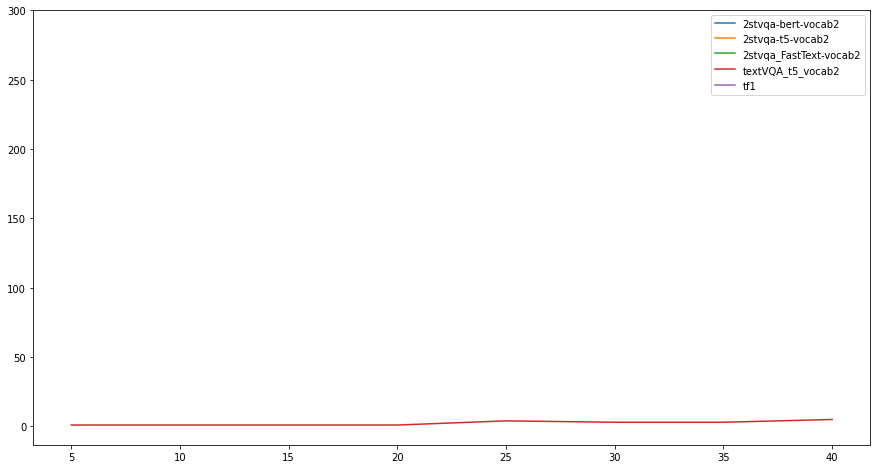

In [8]:
plt.rcParams["figure.figsize"] = (15,8)
for model in models:
    print("Model:", model)
    df_model = df_gen_questions[df_gen_questions["ModelName"]==model]
    plt.plot([e for e in sorted(set(df_model["Epoch"]))], 
             [len(df_model[df_model["Epoch"]==e]["Questions"].tolist()[0]) for e in sorted(set(df_model["Epoch"]))],
            label=model)

             
    #sns.lineplot(y="Questions", x="Epoch", data=df_model)
plt.legend()
plt.show()

Model: textVQA_t5_vocab2


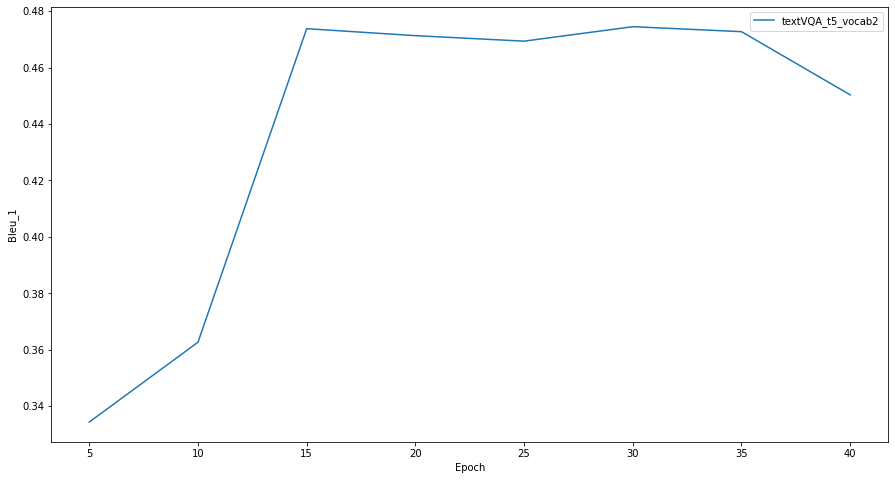

In [9]:
for model in models:
    print("Model:", model)
    df_model = df_scores[df_scores["ModelName"]==model]
    sns.lineplot(y="Bleu_1", x="Epoch", data=df_model, label=model)
plt.legend()
plt.show()

Model: textVQA_t5_vocab2


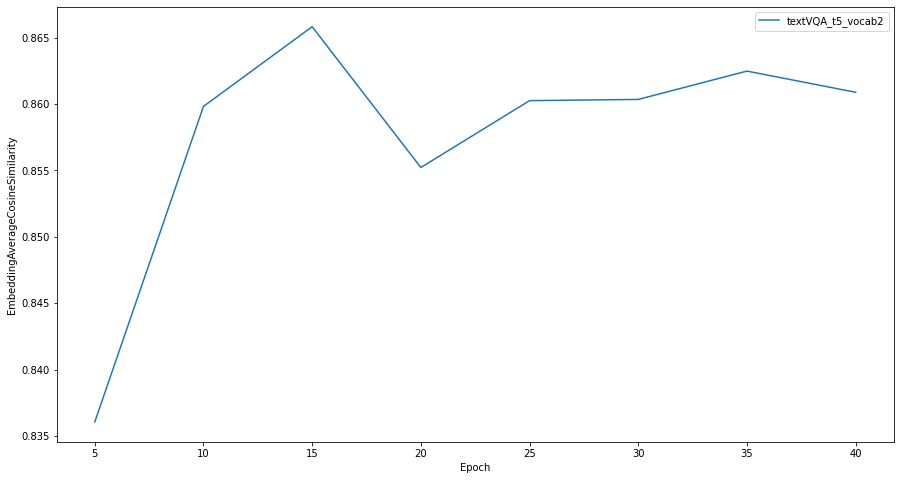

In [10]:
for model in models:
    print("Model:", model)
    df_model = df_scores[df_scores["ModelName"]==model]
    sns.lineplot(y="EmbeddingAverageCosineSimilarity", x="Epoch", data=df_model, label=model)
plt.legend()
plt.show()

In [17]:
with open("img_paths_textVQA.json") as file: # open("img_paths.json") as file:
    img_paths = json.load(file)
    file.close()
    
#with open("answers.json") as file:
#    answers = json.load(file)
#    file.close()


In [18]:
set(df_gen_questions["ModelName"].tolist())

{'FastText_x1x2_vocab1',
 'FastText_x1x2_vocab2',
 'bert_wh_vocab1',
 'bert_wh_vocab2',
 'bert_x1x2_vocab1',
 'bert_x1x2_vocab2',
 't5_x1x2_vocab1',
 't5_x1x2_vocab2',
 'text_VQA_original'}

In [17]:
img_paths

{'0': './VisualGenome/1/2327410.jpg',
 '1': './coco-text/COCO_train2014_000000299024.jpg',
 '2': './VisualGenome/2/2417556.jpg',
 '3': './coco-text/COCO_train2014_000000033213.jpg',
 '4': './coco-text/COCO_train2014_000000323489.jpg',
 '5': './imageNet/n02927161_16645.JPEG',
 '6': './coco-text/COCO_train2014_000000193243.jpg',
 '7': './VisualGenome/2/2400468.jpg',
 '8': './coco-text/COCO_train2014_000000042342.jpg',
 '9': './VisualGenome/1/2349331.jpg',
 '10': './VisualGenome/2/1812.jpg',
 '11': './coco-text/COCO_train2014_000000096809.jpg',
 '12': './VisualGenome/1/2354637.jpg',
 '13': './imageNet/n03492542_30228.JPEG',
 '14': './VisualGenome/1/2356543.jpg',
 '15': './imageNet/n07831146_1546.JPEG',
 '16': './VisualGenome/1/1160020.jpg',
 '17': './coco-text/COCO_train2014_000000389466.jpg',
 '18': './VisualGenome/1/2319366.jpg',
 '19': './vizwiz/VizWiz_train_000000000371.jpg',
 '20': './VisualGenome/1/2359927.jpg',
 '21': './imageNet/n04525305_908.JPEG',
 '22': './coco-text/COCO_train2

 --> 0
Question: how much alcohol is left on the clock ?
     gts: how long has the drink on the right been aged ?


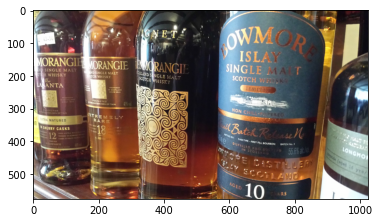

 --> 1
Question: what number is the yellow player ?
     gts: what number is on the player 's jersey ?


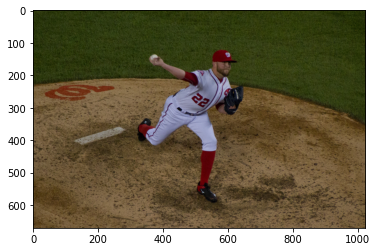

 --> 2
Question: what does the sign say ?
     gts: how many percent is shown on the poster ?


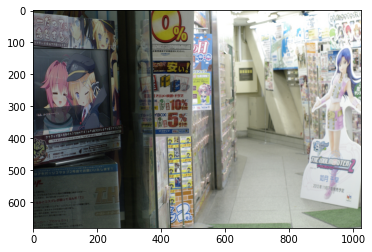

 --> 3
Question: what is the number of the black jersey on the left ?
     gts: how many items can you get for $ 5 ?


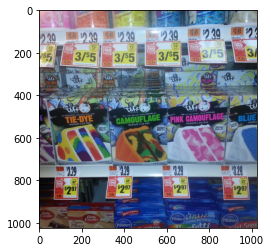

 --> 4
Question: what is the speed limit for ?
     gts: who edited the book ?


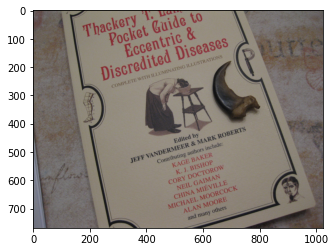

 --> 5
Question: what is the title of this event ?
     gts: what is the title of the book ?


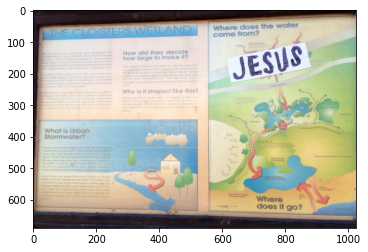

 --> 6
Question: what is the runner 's number ?
     gts: what is the number of the runner in the lead right now ?


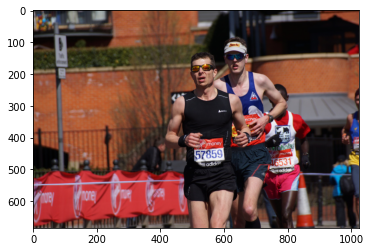

 --> 7
Question: what is the runner 's number ?
     gts: what is the number on the runner in middle ?


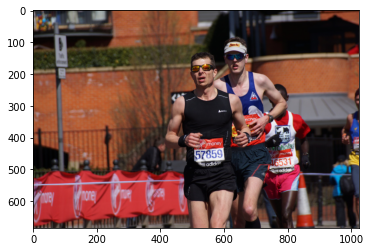

 --> 8
Question: what brand is this drink ?
     gts: what 's the time next to <unk> ?


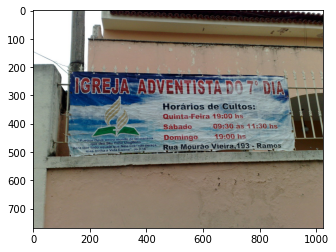

 --> 9
Question: what is the players number ?
     gts: what player number is this football player ?


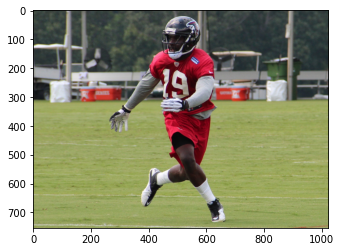

 --> 10
Question: what is the date given ?
     gts: what is the 3 letter word to the left of casa in the text ?


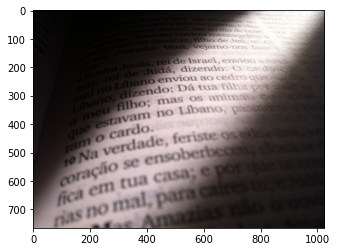

 --> 11
Question: what year is on the wine bottle ?
     gts: what year was this made ?


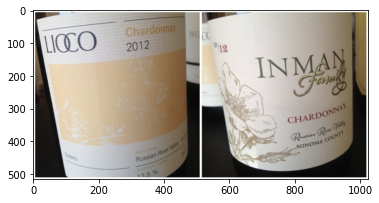

 --> 12
Question: what is the name of this drink ?
     gts: what is the alcohol content ?


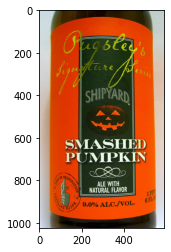

 --> 13
Question: what are the numbers on the back of the girls shirts ?
     gts: what is the name of this <unk> books ?


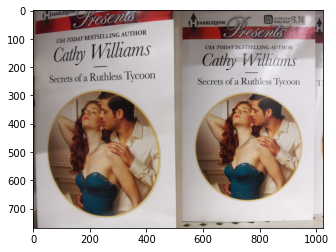

 --> 14
Question: what is the date displayed at the top of the watch ?
     gts: what time is it ?


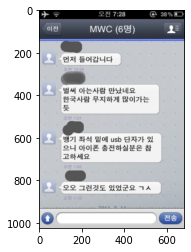

 --> 15
Question: what time is displayed on the phone ?
     gts: what year is written on the bottom ?


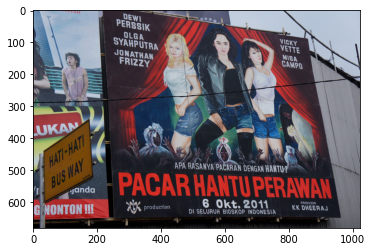

 --> 16
Question: what is the bottom left of the clock ?
     gts: what time is on the clock ?


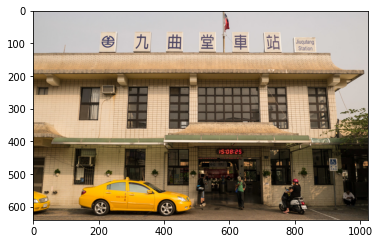

 --> 17
Question: what are the players ' numbers ?
     gts: what does a red symbol indicate about the wine ?


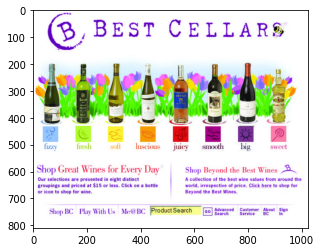

 --> 18
Question: what are the players ' numbers ?
     gts: what is the name of the shop selling these wines ?


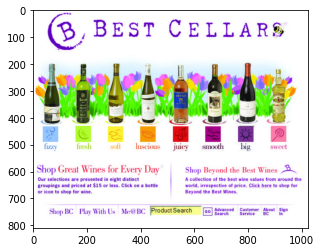

 --> 19
Question: what is the date displayed on the image ?
     gts: what is the first website name on the page ?


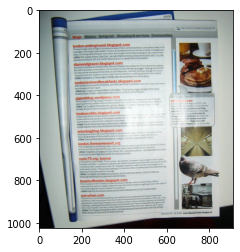

 --> 20
Question: what year is on the bottom right ?
     gts: what track was <unk> <unk> to ?


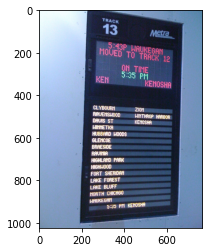

 --> 21
Question: what is the card of this picture ?
     gts: what is being asked on this <unk> ?


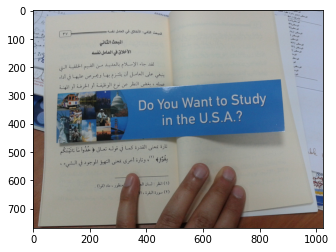

 --> 22
Question: what is the name of this drink ?
     gts: what does <unk> stand for ?


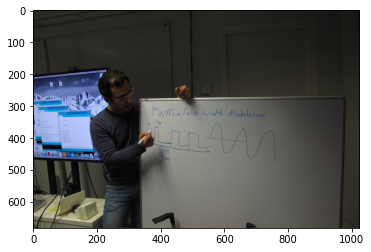

 --> 23
Question: what is the number of the black and green jersey ?
     gts: what number is the pitcher wearing ?


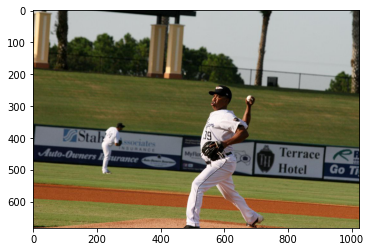

 --> 24
Question: what is the title of the page in the board ?
     gts: what is the name of this ad ?


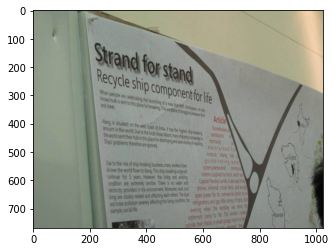

 --> 25
Question: what year is this bottle from ?
     gts: what does it say in the bottom left corner ?


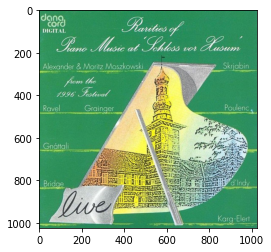

 --> 26
Question: what is the name of the book ?
     gts: where is this letter going ?


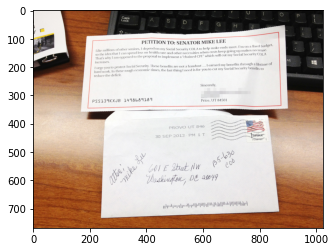

 --> 27
Question: what is the players number ?
     gts: what are the numbers in the background ?


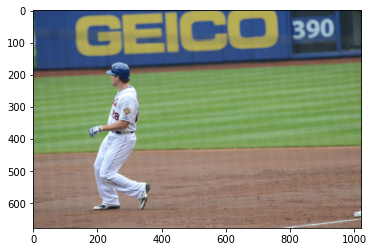

 --> 28
Question: what is the number of the watch ?
     gts: what time is displayed on the phone 's screen ?


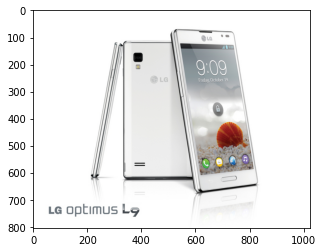

 --> 29
Question: what is the date on the bottle ?
     gts: what does these traffic signs say ?


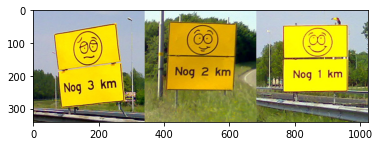

 --> 30
Question: what time is displayed on the phone ?
     gts: what time is displayed on the phone screen ?


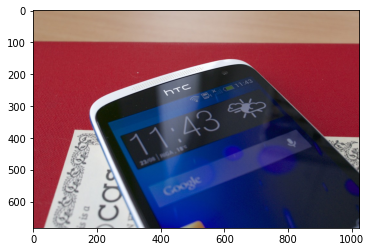

 --> 31
Question: what is the players number ?
     gts: what 's the number written on the back of this player 's shirt ?


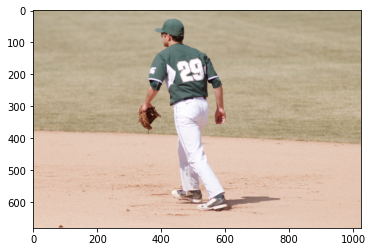

 --> 32
Question: what is the date on the photo ?
     gts: what movie is this from ?


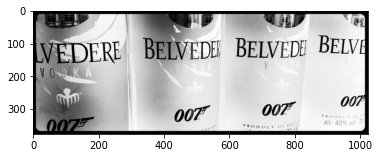

 --> 33
Question: what is the number on the players jersey ?
     gts: what is the jersey number of the blue shirt ?


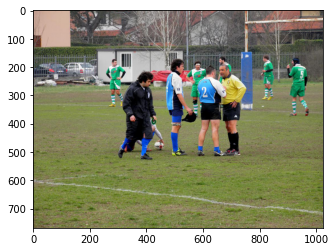

 --> 34
Question: what is the red players jersey number ?
     gts: what runner number does this runner have ?


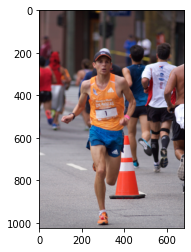

 --> 35
Question: what year is this bottle ?
     gts: what kind of beer is this ?


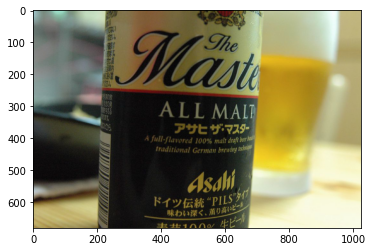

 --> 36
Question: what kind of phone is this ?
     gts: what brand of cellphone is this ?


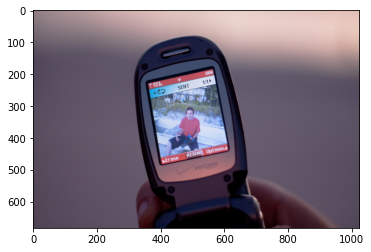

 --> 37
Question: what is the buses plate number ?
     gts: how wide is the <unk> screen ?


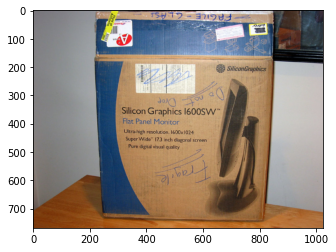

 --> 38
Question: what year is on the bottle ?
     gts: when was this beer created ?


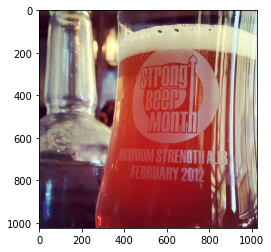

 --> 39
Question: what is the brand of wine ?
     gts: what kind of wine it this ?


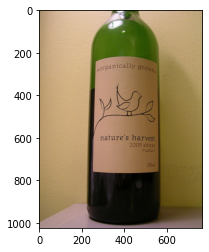

 --> 40
Question: what is the brand of wine ?
     gts: what is the name of this bottle of wine ?


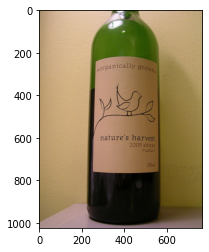

 --> 41
Question: what is the brand name to the left ?
     gts: what are the numbers on the computer screen ?


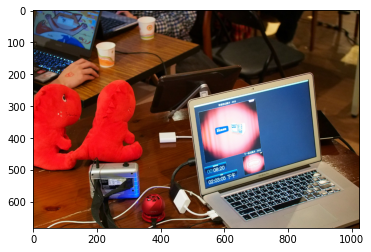

 --> 42
Question: what is the brand of the watch ?
     gts: what number is on the bike on the right ?


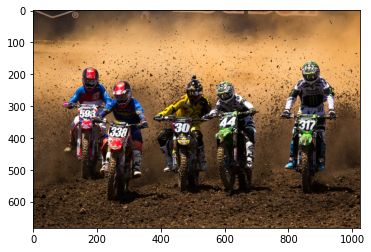

 --> 43
Question: what number is on the bottle ?
     gts: what number is on the middle bike ?


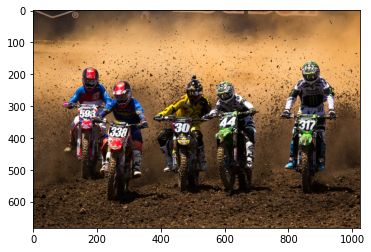

 --> 44
Question: how many cleaning <unk> are in the top left in the bottom left ?
     gts: which year is the <unk> poster from ?


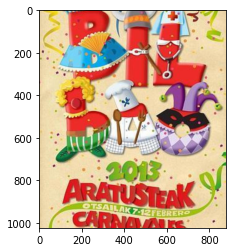

 --> 45
Question: what is the title of the article in the top left ?
     gts: when is the <unk> ?


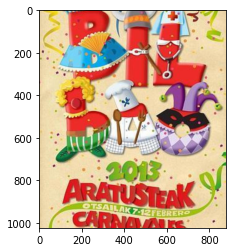

 --> 46
Question: what is the title of this book ?
     gts: what is the time on the device ?


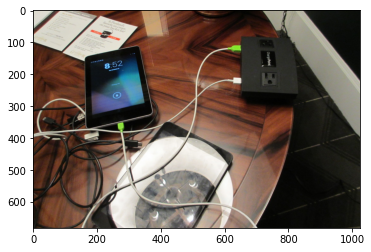

 --> 47
Question: what is the title of this event ?
     gts: what is the title of the album ?


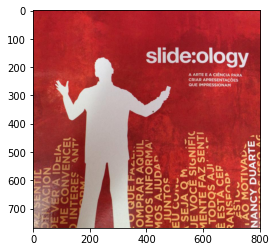

 --> 48
Question: what is the name of the company ?
     gts: what is the phone number listed to rent this billboard ?


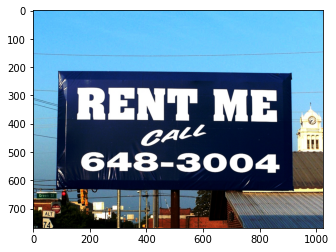

 --> 49
Question: what brand of calculator is this ?
     gts: what brand is the calculator ?


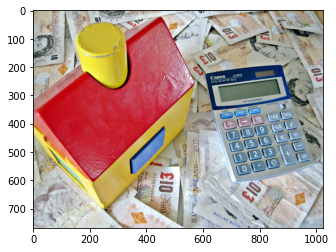

In [20]:
# Load images and generated questions
l = range(0, 50)
model = "bert_x1x2_vocab2"
epoch = 40


for j, i in enumerate(l):
        print(" -->", j)
        question = df_gen_questions.loc[(df_gen_questions['ModelName']==model) & (df_gen_questions['Epoch']==epoch)]['all_questions'].iloc[0][i]
        gts_question = df_gts_questions.loc[(df_gts_questions['ModelName']==model) & (df_gts_questions['Epoch']==epoch)]['all_questions'].iloc[0][i]
        index = df_indices.loc[(df_indices['ModelName']==model) & (df_indices['Epoch']==epoch)]['Index'].iloc[0][i]
        path = img_paths[str(index)]
        print("Question:", question) #, " --> Answer:", answers[path[2:]+'-'+gts_question])
        print("     gts:", gts_question)
        img=mpimg.imread(f'data_textVQA/train_val_images/train_images/{path}.jpg')
        #img=mpimg.imread(f'./data/ST-VQA/{path}')
        plt.imshow(img)
        plt.show()

In [10]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-2tbsgddq
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-2tbsgddq
  Resolved https://github.com/openai/CLIP.git to commit b46f5ac7587d2e1862f8b7b1573179d80dcdd620


In [18]:
# import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import json
import matplotlib.image as mpimg
import seaborn as sns

from collections import OrderedDict, Counter
import torch

import clip

clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [19]:
m, preprocess = clip.load("ViT-B/32")
m.cuda().eval()
input_resolution = m.visual.input_resolution
context_length = m.context_length
vocab_size = m.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in m.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


# Load images and generated questions
model = "new_model_t5"
epoch = 5
l = range(0, len(df_gen_questions['all_questions'][0]))

scores = []
for j, i in enumerate(l):
        question = df_gen_questions.loc[(df_gen_questions['ModelName']==model) & (df_gen_questions['Epoch']==epoch)]['all_questions'].iloc[0][i]
        gts_question = df_gts_questions.loc[(df_gts_questions['ModelName']==model) & (df_gts_questions['Epoch']==epoch)]['all_questions'].iloc[0][i]
        index = df_indices.loc[(df_indices['ModelName']==model) & (df_indices['Epoch']==epoch)]['Index'].iloc[0][i]
        path = img_paths[str(index)]
        # print("Question:", question) #, " --> Answer:", answers[path[2:]+'-'+gts_question])
        # print("     gts:", gts_question)
        # img = mpimg.imread(f'/content/drive/MyDrive/train_val_images/train_images/{path}.jpg')
        im = Image.open(os.path.join("./data_textVQA/train_val_images/train_images/", f"{path}.jpg")).convert("RGB")

        images = []
        texts = []
        images.append(preprocess(im))
        texts.append(" ".join(question.split(" ")))
        image_input = torch.tensor(np.stack(images)).cuda()
        text_tokens = clip.tokenize([d for d in texts]).cuda()

        with torch.no_grad():
          image_features = m.encode_image(image_input).float()
          text_features = m.encode_text(text_tokens).float()

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
        scores.append(similarity)
        # print("Score:", similarity)

        # plt.imshow(img)
        # plt.show()
print("Similarity:", np.mean(scores))

In [24]:
df_clip = pd.DataFrame()
l = range(0, len(df_gen_questions['all_questions'][0]))

path_mod = "./random/"
models = next(os.walk(path_mod))[1]

for model in models:
    epochs = next(os.walk(f"{path_mod}/{model}"))[1]
    
    for epoch in epochs:
        print(model, epoch)
        
        if not os.path.isfile(f"{path_mod}/{model}/{epoch}/clip.json"):
            e = epoch.split("-")[1]
            #try:
            scores = []
            for j, i in enumerate(l):
                question = df_gen_questions.loc[(df_gen_questions['ModelName']==model) & (df_gen_questions['Epoch']==int(e))]['all_questions'].iloc[0][i]
                gts_question = df_gts_questions.loc[(df_gts_questions['ModelName']==model) & (df_gts_questions['Epoch']==int(e))]['all_questions'].iloc[0][i]
                index = df_indices.loc[(df_indices['ModelName']==model) & (df_indices['Epoch']==int(e))]['Index'].iloc[0][i]
                path = img_paths[str(index)]
                im = Image.open(os.path.join("./data/ST-VQA/", f"{path}")).convert("RGB")

                images = []
                texts = []
                images.append(preprocess(im))
                texts.append(" ".join(question.split(" ")))
                image_input = torch.tensor(np.stack(images)).cuda()
                text_tokens = clip.tokenize([d for d in texts]).cuda()

                with torch.no_grad():
                    image_features = m.encode_image(image_input).float()
                    text_features = m.encode_text(text_tokens).float()

                image_features /= image_features.norm(dim=-1, keepdim=True)
                text_features /= text_features.norm(dim=-1, keepdim=True)
                similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
                scores.append(similarity[0][0])
            aux = {}
            aux["ModelName"] = model
            aux["Epoch"] = int(e)
            aux["CLIP_scores"] = np.array(scores).tolist()
            aux["CLIP_mean"] = float(np.mean(scores))
            aux["CLIP_median"] = float(np.median(scores))
            aux["CLIP_min"] = float(min(scores))
            aux["CLIP_max"] = float(max(scores))
            aux["CLIP_std"] = float(np.std(scores))
            with open(f"{path_mod}/{model}/{epoch}/clip.json", 'w') as fp:
                json.dump(aux, fp)
        with open(f"{path_mod}/{model}/{epoch}/clip.json") as file:
            scores = json.load(file)
            file.close()

        df_clip = df_clip.append(scores, ignore_index=True)
        #except:
        #    pass
        
if not os.path.isfile(f"{path_mod}/gts/clip.json"):
    e = epoch.split("-")[1]
    #try:
    scores = []
    for j, i in enumerate(l):
        #question = df_gen_questions.loc[(df_gen_questions['ModelName']==model) & (df_gen_questions['Epoch']==int(e))]['all_questions'].iloc[0][i]
        gts_question = df_gts_questions.loc[(df_gts_questions['ModelName']==model)]['all_questions'].iloc[0][i]
        index = df_indices.loc[(df_indices['ModelName']==model) & (df_indices['Epoch']==int(e))]['Index'].iloc[0][i]
        path = img_paths[str(index)]
        im = Image.open(os.path.join("./data/ST-VQA/", f"{path}")).convert("RGB")

        images = []
        texts = []
        images.append(preprocess(im))
        texts.append(" ".join(gts_question.split(" ")))
        image_input = torch.tensor(np.stack(images)).cuda()
        text_tokens = clip.tokenize([d for d in texts]).cuda()

        with torch.no_grad():
            image_features = m.encode_image(image_input).float()
            text_features = m.encode_text(text_tokens).float()

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
        scores.append(similarity[0][0])
    aux = {}
    aux["ModelName"] = "gts"
    aux["Epoch"] = None
    aux["CLIP_scores"] = np.array(scores).tolist()
    aux["CLIP_mean"] = float(np.mean(scores))
    aux["CLIP_median"] = float(np.median(scores))
    aux["CLIP_min"] = float(min(scores))
    aux["CLIP_max"] = float(max(scores))
    aux["CLIP_std"] = float(np.std(scores))
    with open(f"{path_mod}/gts/clip.json", 'w') as fp:
        json.dump(aux, fp)
with open(f"{path_mod}/gts/clip.json") as file:
    scores = json.load(file)
    file.close()

df_clip = df_clip.append(scores, ignore_index=True)

2stvqa-bert-vocab2 results-5


FileNotFoundError: [Errno 2] No such file or directory: './data/ST-VQA/./dbf4c96c188b5f4f'

In [14]:
df_clip

ModelName  Epoch  \
0    2stvqa-t5-vocab2   10.0   
1    2stvqa-t5-vocab2   15.0   
2    2stvqa-t5-vocab2    5.0   
3    2stvqa-t5-vocab2   25.0   
4    2stvqa-t5-vocab2   20.0   
5   textVQA_t5_vocab2   10.0   
6   textVQA_t5_vocab2   15.0   
7   textVQA_t5_vocab2    5.0   
8   textVQA_t5_vocab2   35.0   
9   textVQA_t5_vocab2   40.0   
10  textVQA_t5_vocab2   25.0   
11  textVQA_t5_vocab2   20.0   
12  textVQA_t5_vocab2   30.0   

                                          CLIP_scores  CLIP_mean  CLIP_median  \
0   [0.2352370023727417, 0.1746693253517151, 0.272...   0.214554     0.212958   
1   [0.2352370023727417, 0.1557846963405609, 0.250...   0.215365     0.212748   
2   [0.2352370023727417, 0.20523248612880707, 0.25...   0.217595     0.215056   
3   [0.1988580971956253, 0.1811751127243042, 0.272...   0.216516     0.215952   
4   [0.2181801199913025, 0.22395892441272736, 0.26...   0.215131     0.213851   
5   [0.16913974285125732, 0.1680070012807846, 0.21...   0.178458     0.177723   
6   [0.19588133692741394, 0.19789643585681915, 0.2...   0.179779     0.179086   
7   [0.22430193424224854, 0.1921384185552597, 0.19...   0.181123     0.180699   
8   [0.16296298801898956, 0.17856502532958984, 0.1...   0.172502     0.170916   
9   [0.22302153706550598, 0.17856502532958984, 0.2...   0.178208     0.176003   
10  [0.14607098698616028, 0.1686849594116211, 0.15...   0.172853     0.168480   
11  [0.20629237592220306, 0.2020656168460846, 0.22...   0.188522     0.187904   
12  [0.1557455211877823, 0.17856502532958984, 0.17...   0.170838     0.169526   

    CLIP_min  CLIP_max  CLIP_std  
0   0.110130  0.303365  0.035398  
1   0.119163  0.315334  0.035711  
2   0.117485  0.303365  0.034761  
3   0.082369  0.310028  0.036679  
4   0.105343  0.301395  0.034532  
5   0.123886  0.241782  0.018663  
6   0.117410  0.245243  0.019486  
7   0.125816  0.273031  0.022153  
8   0.107820  0.261559  0.022108  
9   0.095367  0.261559  0.029950  
10  0.084938  0.286198  0.028647  
11  0.138505  0.247578  0.017201  
12  0.107820  0.281583  0.022526

In [25]:
df_clip = pd.DataFrame()
l = range(0, len(df_gen_questions['all_questions'][10]))

path_mod = "./random/"
models = next(os.walk(path_mod))[1]

for model in models:
    epochs = next(os.walk(f"{path_mod}/{model}"))[1]
    
    for epoch in epochs:
        print(model, epoch)
        
        if not os.path.isfile(f"{path_mod}/{model}/{epoch}/clip.json"):
            e = epoch.split("-")[1]
            #try:
            scores = []
            for j, i in enumerate(l):
                question = df_gen_questions.loc[(df_gen_questions['ModelName']==model) & (df_gen_questions['Epoch']==int(e))]['all_questions'].iloc[0][i]
                gts_question = df_gts_questions.loc[(df_gts_questions['ModelName']==model) & (df_gts_questions['Epoch']==int(e))]['all_questions'].iloc[0][i]
                index = df_indices.loc[(df_indices['ModelName']==model) & (df_indices['Epoch']==int(e))]['Index'].iloc[0][i]
                path = img_paths[str(index)]
                im = Image.open(os.path.join("./data_textVQA/train_val_images/train_images/", f"{path}.jpg")).convert("RGB")

                images = []
                texts = []
                images.append(preprocess(im))
                texts.append(" ".join(question.split(" ")))
                image_input = torch.tensor(np.stack(images)).cuda()
                text_tokens = clip.tokenize([d for d in texts]).cuda()

                with torch.no_grad():
                    image_features = m.encode_image(image_input).float()
                    text_features = m.encode_text(text_tokens).float()

                image_features /= image_features.norm(dim=-1, keepdim=True)
                text_features /= text_features.norm(dim=-1, keepdim=True)
                similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
                scores.append(similarity[0][0])
            aux = {}
            aux["ModelName"] = model
            aux["Epoch"] = int(e)
            aux["CLIP_scores"] = np.array(scores).tolist()
            aux["CLIP_mean"] = float(np.mean(scores))
            aux["CLIP_median"] = float(np.median(scores))
            aux["CLIP_min"] = float(min(scores))
            aux["CLIP_max"] = float(max(scores))
            aux["CLIP_std"] = float(np.std(scores))
            with open(f"{path_mod}/{model}/{epoch}/clip.json", 'w') as fp:
                json.dump(aux, fp)
        with open(f"{path_mod}/{model}/{epoch}/clip.json") as file:
            scores = json.load(file)
            file.close()

        df_clip = df_clip.append(scores, ignore_index=True)
        #except:
        #    pass
        
"""if not os.path.isfile(f"{path_mod}/gts/clip.json"):
    e = epoch.split("-")[1]
    #try:
    scores = []
    for j, i in enumerate(l):
        #question = df_gen_questions.loc[df_gen_questions['ModelName']==model]['all_questions'].iloc[0][randrange(0, len(df_gen_questions['all_questions'][6]))]
        gts_question = df_gts_questions.loc[(df_gts_questions['ModelName']==model)]['all_questions'].iloc[0][randrange(0, len(df_gen_questions['all_questions'][0]))]
        index = df_indices.loc[(df_indices['ModelName']==model) & (df_indices['Epoch']==int(e))]['Index'].iloc[0][i]
        path = img_paths[str(index)]
        im = Image.open(os.path.join("./data_textVQA/train_val_images/train_images/", f"{path}.jpg")).convert("RGB")

        images = []
        texts = []
        images.append(preprocess(im))
        texts.append(" ".join(gts_question.split(" ")))
        image_input = torch.tensor(np.stack(images)).cuda()
        text_tokens = clip.tokenize([d for d in texts]).cuda()

        with torch.no_grad():
            image_features = m.encode_image(image_input).float()
            text_features = m.encode_text(text_tokens).float()

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
        scores.append(similarity[0][0])
    aux = {}
    aux["ModelName"] = "gts"
    aux["Epoch"] = None
    aux["CLIP_scores"] = np.array(scores).tolist()
    aux["CLIP_mean"] = float(np.mean(scores))
    aux["CLIP_median"] = float(np.median(scores))
    aux["CLIP_min"] = float(min(scores))
    aux["CLIP_max"] = float(max(scores))
    aux["CLIP_std"] = float(np.std(scores))
    with open(f"{path_mod}/gts/clip.json", 'w') as fp:
        json.dump(aux, fp)
with open(f"{path_mod}/gts/clip.json") as file:
    scores = json.load(file)
    file.close()

df_clip = df_clip.append(scores, ignore_index=True)"""

2stvqa-bert-vocab2 results-5
2stvqa-t5-vocab2 results-5
2stvqa_FastText-vocab2 results-5
textVQA_t5_vocab2 results-10
textVQA_t5_vocab2 results-15
textVQA_t5_vocab2 results-5
textVQA_t5_vocab2 results-35
textVQA_t5_vocab2 results-40
textVQA_t5_vocab2 results-25
textVQA_t5_vocab2 results-20
textVQA_t5_vocab2 results-30
256 results-40


'if not os.path.isfile(f"{path_mod}/gts/clip.json"):\n    e = epoch.split("-")[1]\n    #try:\n    scores = []\n    for j, i in enumerate(l):\n        #question = df_gen_questions.loc[df_gen_questions[\'ModelName\']==model][\'all_questions\'].iloc[0][randrange(0, len(df_gen_questions[\'all_questions\'][6]))]\n        gts_question = df_gts_questions.loc[(df_gts_questions[\'ModelName\']==model)][\'all_questions\'].iloc[0][randrange(0, len(df_gen_questions[\'all_questions\'][0]))]\n        index = df_indices.loc[(df_indices[\'ModelName\']==model) & (df_indices[\'Epoch\']==int(e))][\'Index\'].iloc[0][i]\n        path = img_paths[str(index)]\n        im = Image.open(os.path.join("./data_textVQA/train_val_images/train_images/", f"{path}.jpg")).convert("RGB")\n\n        images = []\n        texts = []\n        images.append(preprocess(im))\n        texts.append(" ".join(gts_question.split(" ")))\n        image_input = torch.tensor(np.stack(images)).cuda()\n        text_tokens = clip.tokenize([

In [26]:
df_clip

ModelName  Epoch  \
0       2stvqa-bert-vocab2    5.0   
1         2stvqa-t5-vocab2    5.0   
2   2stvqa_FastText-vocab2    5.0   
3        textVQA_t5_vocab2   10.0   
4        textVQA_t5_vocab2   15.0   
5        textVQA_t5_vocab2    5.0   
6        textVQA_t5_vocab2   35.0   
7        textVQA_t5_vocab2   40.0   
8        textVQA_t5_vocab2   25.0   
9        textVQA_t5_vocab2   20.0   
10       textVQA_t5_vocab2   30.0   
11                     256   40.0   

                                          CLIP_scores  CLIP_mean  CLIP_median  \
0   [0.1757543385028839, 0.19017255306243896, 0.18...   0.180015     0.178692   
1   [0.2352370023727417, 0.20523248612880707, 0.25...   0.217595     0.215056   
2   [0.1757543385028839, 0.19017255306243896, 0.19...   0.178403     0.177261   
3   [0.16913974285125732, 0.1680070012807846, 0.21...   0.178458     0.177723   
4   [0.19588133692741394, 0.19789643585681915, 0.2...   0.179779     0.179086   
5   [0.22430193424224854, 0.1921384185552597, 0.19...   0.181123     0.180699   
6   [0.16296298801898956, 0.17856502532958984, 0.1...   0.172502     0.170916   
7   [0.22302153706550598, 0.17856502532958984, 0.2...   0.178208     0.176003   
8   [0.14607098698616028, 0.1686849594116211, 0.15...   0.172853     0.168480   
9   [0.20629237592220306, 0.2020656168460846, 0.22...   0.188522     0.187904   
10  [0.1557455211877823, 0.17856502532958984, 0.17...   0.170838     0.169526   
11  [0.24426142871379852, 0.17920127511024475, 0.1...   0.198521     0.194843   

    CLIP_min  CLIP_max  CLIP_std  
0   0.096836  0.263045  0.026536  
1   0.117485  0.303365  0.034761  
2   0.098708  0.272236  0.026564  
3   0.123886  0.241782  0.018663  
4   0.117410  0.245243  0.019486  
5   0.125816  0.273031  0.022153  
6   0.107820  0.261559  0.022108  
7   0.095367  0.261559  0.029950  
8   0.084938  0.286198  0.028647  
9   0.138505  0.247578  0.017201  
10  0.107820  0.281583  0.022526  
11  0.106273  0.296875  0.035555

In [ ]:
for model in models:
    print("Model:", model)
    df_model = df_clip[df_clip["ModelName"]==model]
    sns.lineplot(y="CLIP_mean", x="Epoch", data=df_model, label=model)
plt.legend()
plt.show()

In [ ]:
for model in models:
    print("Model:", model)
    df_model = df_clip[df_clip["ModelName"]==model]
    sns.lineplot(y="CLIP_median", x="Epoch", data=df_model, label=model)
plt.legend()
plt.show()

In [ ]:
models

In [ ]:
models2 = ["bert_x1x2_vocab2", "bert_x1x2_vocab1"]

for model in models2:
    print("Model:", model)
    df_model = df_clip[df_clip["ModelName"]==model]
    # sns.lineplot(y="CLIP_std", x="Epoch", data=df_model, label=model)
    
    plt.errorbar(df_model["Epoch"], df_model["CLIP_mean"], df_model["CLIP_std"], linestyle='None', marker='^', label=model)
plt.legend()
plt.show()


In [ ]:
df_clip[df_clip["Epoch"]==50]